<a href="https://colab.research.google.com/github/YM53858/DATA-690-WANG/blob/master/Assignment_08/Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 8
For this assignment , we will use the college scorecard dataset. 
<pre>
From the 22 individual school year data files, randomly (using Python) select one file. 
Only read the column "TUITIONFEE_IN" frm this file into a data frame.
Find out how many observations this data frame has.
Find out how many observations that have missing value. Drop those observations.
Find out how many observations that have value of zero. Drop those observations.
Calculate the mean of the tuition.
Randomly select one observation, find out the tuition of that observation.
Calculate the different between the tuition of this observation and the average tuition (mean) off all observations above.
Randomly select another observation and repeat the above.
Randomly select another observation and repeat the above.
Randomly select 5 observations, display the tuition of these observation.
Calculate the average of these 5 observations
Calculate the different between the average tuition of thes 5 observations and the average tuition (mean) off all observations above.
Randomly select another 5 observations and repeat the above.
Randomly select another 5 observation and repeat the above.

Randomly select 10 observations, display the tuition of these observation.
Calculate the average of these 10 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 10 observations and repeat the above.
Randomly select another 10 observation and repeat the above.


Randomly select 20 observations, display the tuition of these observation.
Calculate the average of these 20 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 20 observations and repeat the above.
Randomly select another 20 observation and repeat the above.

Randomly select 30 observations, display the tuition of these observation.
Calculate the average of these 30 observations
Calculate the different between the average tuition of thes 10 observations and the average tuition (mean) off all observations above.
Randomly select another 30 observations and repeat the above.
Randomly select another 30 observation and repeat the above.

Write a function that take an input x (number of observations). 
The function will perform the following:

Randomly select x observations, display the tuition of these observations.
Calculate the average of these x observations
Calculate the different between the average tuition of these x observations and the average tuition (mean) off all observations above.
Display the difference.
<pre>


In [ ]:
# 1 - Import necessary libraries

import pandas as pd
import numpy as np
import os
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To avoid warnings

In [ ]:
path = os.getcwd()
path

'C:\\Users\\saivi\\Desktop\\690 STATS&VIZ\\Assignment 8'

In [ ]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

clist = os.listdir("CollegeScorecard_Raw_Data/")
clist[:] = [x for x in clist if x.startswith("MERGED")==True]
clist

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2018_19_PP.csv']

In [ ]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

file_name = random.choice(clist)
file_name

'MERGED2001_02_PP.csv'

In [ ]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

df = pd.read_csv("CollegeScorecard_Raw_Data/"+file_name, usecols=['INSTNM','TUITIONFEE_IN']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725 entries, 0 to 6724
Data columns (total 2 columns):
INSTNM           6725 non-null object
TUITIONFEE_IN    3920 non-null float64
dtypes: float64(1), object(1)
memory usage: 105.2+ KB


In [ ]:
# 5 - Find out how many observations have missing value.
df.isna().sum()

INSTNM              0
TUITIONFEE_IN    2805
dtype: int64

In [ ]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 1 to 6724
Data columns (total 2 columns):
INSTNM           3920 non-null object
TUITIONFEE_IN    3920 non-null float64
dtypes: float64(1), object(1)
memory usage: 91.9+ KB


In [ ]:
# 7 - Find out how many observations have 0 tution. 
df.astype(bool).sum(axis=0)

INSTNM           3920
TUITIONFEE_IN    3909
dtype: int64

TUITIONFEE_IN column has zero values

In [ ]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df['TUITIONFEE_IN'] = df['TUITIONFEE_IN'].replace(0, np.nan)
df = df.dropna()
df.astype(bool).sum(axis=0)

INSTNM           3909
TUITIONFEE_IN    3909
dtype: int64

Dropped the rows with zero value successfully.

In [ ]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations 

t_mean = df['TUITIONFEE_IN'].mean()
print("The mean or average of the tuitions of all the remaining observations is ", df['TUITIONFEE_IN'].mean())

The mean or average of the tuitions of all the remaining observations is  7416.178562292146


In [ ]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation. 

r_df = df.sample(n=1)
r_df

,INSTNM,TUITIONFEE_IN
3216,Meredith College,14465.0


In [ ]:
t_sr = r_df['TUITIONFEE_IN'].values[0]
r_df['TUITIONFEE_IN']

3216    14465.0
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference

diff_sr = abs(t_mean - t_sr ) # difference between mean and randon observation tuition_fee
diff_sr

7048.821437707854

In [ ]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

for i in range(1,11): # Repeating 10 times
    r_df = df.sample()
    t = r_df['TUITIONFEE_IN'].values[0]
    print(r_df['TUITIONFEE_IN'])
    print("The different between the tuition of this observation and the mean tuition is ",abs(t_mean - t ))
    print('------------------------------------')

1865    2612.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  4804.178562292146
------------------------------------
6600    9140.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  1723.8214377078539
------------------------------------
4594    11060.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  3643.821437707854
------------------------------------
3375    2196.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  5220.178562292146
------------------------------------
4637    13080.0
Name: TUITIONFEE_IN, dtype: float64
The different between the tuition of this observation and the mean tuition is  5663.821437707854
------------------------------------
900    13680.0
Name: TUITIONFEE_IN, dtype: float64
The different between

In [ ]:
# 13 - Randomly select 20 observations, display the tuition of these observation. 
r_df = df.sample(n=20)
r_df['TUITIONFEE_IN']

5866    10948.0
3284     2316.0
3828     8500.0
3479     3246.0
2172     1633.0
1093    18790.0
4303     8652.0
4910     2023.0
4387    13480.0
5227    13465.0
4792     2150.0
6634     4120.0
1889     2048.0
1193    12640.0
1548    15908.0
4397     7378.0
1960    12350.0
3432    19076.0
600       288.0
2028    17184.0
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 14 - Calculate and display the mean tuition of these 20 observations
m = r_df['TUITIONFEE_IN'].mean()
m

8809.75

In [ ]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
abs(r_df['TUITIONFEE_IN']-m)

5866     2138.25
3284     6493.75
3828      309.75
3479     5563.75
2172     7176.75
1093     9980.25
4303      157.75
4910     6786.75
4387     4670.25
5227     4655.25
4792     6659.75
6634     4689.75
1889     6761.75
1193     3830.25
1548     7098.25
4397     1431.75
1960     3540.25
3432    10266.25
600      8521.75
2028     8374.25
Name: TUITIONFEE_IN, dtype: float64

In [ ]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

for i in range(1,16): # Repeating 15 times
    print("OBSERVATION " + str(i) +" :")
    r_df = df.sample(n=20)
    m = r_df['TUITIONFEE_IN'].mean()
    print("mean is ",m)
    diff1 = abs(r_df['TUITIONFEE_IN']-m)
    d = {'TUITIONFEE_IN':r_df['TUITIONFEE_IN'].to_list(), 'Mean_difference_20records': diff1.to_list()}
    df_20 = pd.DataFrame(data=d)
    print(df_20)
    print('------------------------------------------------------')

OBSERVATION 1 :
mean is  5918.45
    TUITIONFEE_IN  Mean_difference_20records
0         12060.0                    6141.55
1          1080.0                    4838.45
2          2705.0                    3213.45
3          4310.0                    1608.45
4          7372.0                    1453.55
5           698.0                    5220.45
6         17448.0                   11529.55
7           308.0                    5610.45
8         10948.0                    5029.55
9         13650.0                    7731.55
10         4586.0                    1332.45
11        15420.0                    9501.55
12         2260.0                    3658.45
13          992.0                    4926.45
14         2940.0                    2978.45
15         2222.0                    3696.45
16         4850.0                    1068.45
17         6692.0                     773.55
18          388.0                    5530.45
19         7440.0                    1521.55
----------------------

### Conclusion :
#### Mean differences that are calculated with a sample of 20 records are higher than those which are calcualted with a sample of 1 record in most of the cases

Write a function that take two input parameters:
- x (number of observations) 
- y (the name of the dataframe). 

The function will perform the following: 
- Randomly select x observations from y
- Calculate the mean of these x observations 
- Calculate the mean of all observations
- Calculate the difference between the two means 
- Return the difference

In [ ]:
# 17 - write function Code here
def fun(x,y): # x is number of observations, y is the name of the dataframe
    random_df = y.sample(x) 
    mean_20 = random_df['TUITIONFEE_IN'].mean()
    mean = y['TUITIONFEE_IN'].mean()
    diff  = abs(mean - mean_20)
    return diff

In [ ]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
fun(5,df)

107.62143770785406

In [ ]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50

n = []
for i in range(1,51):
    n.append(i)

print(n)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [ ]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed

means_diff=[] # list for storing differences of population mean and sample means.
mean = df['TUITIONFEE_IN'].mean() # population mean

for i in n:
    n_df = df.sample(n=i)
    s_mean = n_df['TUITIONFEE_IN'].mean()
    means_diff.append(abs(s_mean-mean))

print(means_diff)
    
    

[148.82143770785387, 2530.178562292146, 1061.1547710411878, 7890.071437707854, 2620.4214377078542, 1310.845228958813, 581.321419435003, 649.9285622921461, 558.2896734032574, 243.17856229214613, 2556.730528616944, 55.821437707853875, 479.33240844599186, 662.3214377078539, 9.154771041186905, 113.30356229214613, 977.6491505274398, 1759.2896734032574, 737.5996149237253, 1678.9714377078535, 790.1785622921461, 3508.7759831624, 67.17856229214613, 1020.6368956254792, 145.0214377078537, 379.255485369069, 1583.5118956254792, 408.178580564997, 1245.5923553955945, 135.9547710411871, 1904.1785622921461, 44.852687707853875, 569.8755319891161, 285.6785622921461, 512.5642948507111, 635.5992154856312, 296.69207580565944, 418.25750966056694, 1728.3324084459919, 495.5964377078535, 814.1785622921461, 218.7261813397654, 1022.0307400334359, 1061.246744110328, 75.0007845143682, 1832.12578553394, 950.0129270695552, 38.488104374520844, 19.71939689152714, 1360.758562292146]


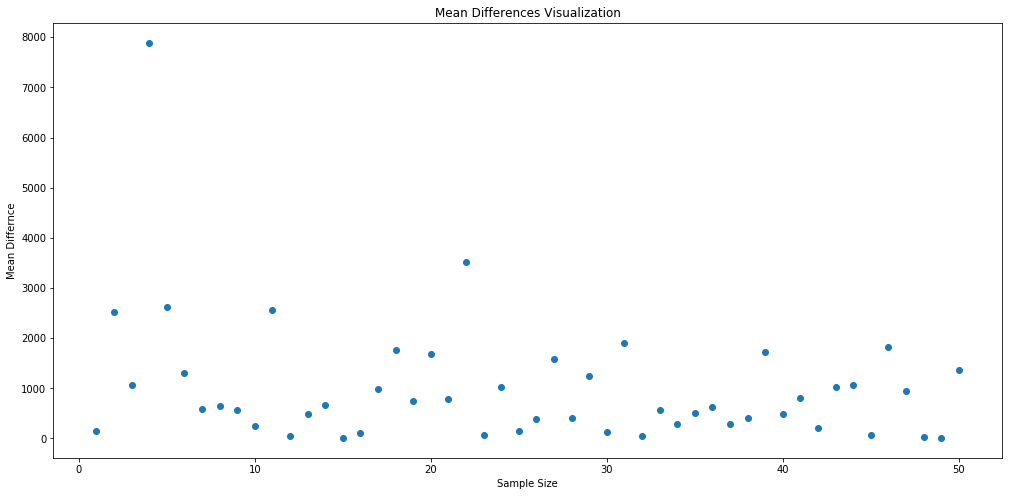

In [ ]:
# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough 
# d = {'Sample Size':n, 'Mean Difference': means_diff}
# s_plot_df = pd.DataFrame(data=d)

# s_plot_df.plot()

fig, ax = plt.subplots(figsize=(17,8))

# Create scatter plot
ax.scatter(n, 
           means_diff)

ax.set(title = "Mean Differences Visualization",
       xlabel = "Sample Size", 
       ylabel = "Mean Differnce")

plt.show()

Now, Trying it with a sample size of 300

In [ ]:
n = []
for i in range(1,301): # sample size of 300
    n.append(i)

In [ ]:
means_diff=[] # list for storing differences of population mean and sample means.
mean = df['TUITIONFEE_IN'].mean() # population mean

for i in n:
    n_df = df.sample(n=i)
    s_mean = n_df['TUITIONFEE_IN'].mean()
    means_diff.append(abs(s_mean-mean))

print(means_diff)

[5219.178562292146, 3288.178562292146, 77.17856229214613, 2273.928562292146, 3543.621437707853, 2682.178562292146, 3430.2500091364245, 4685.696437707854, 796.9325488189652, 2491.2214377078535, 636.3603804739641, 1399.3214377078539, 952.8708699844537, 1238.5357051492892, 730.8214377078539, 2352.196437707854, 120.58614359020703, 1958.7103265967426, 958.2951219183806, 1078.5714377078539, 2257.8690567554722, 405.63310774669117, 350.64752466437585, 2711.886895625479, 261.25856229214605, 981.6016392152233, 1064.2288451152608, 1009.7500091364245, 1559.5800583975097, 1282.2214377078535, 634.1140461631139, 632.0535622921461, 832.5421986557822, 975.4432681744993, 1369.5071519935673, 32.071437707853875, 178.82143770785387, 1397.468035976357, 1017.2316941181098, 186.7785622921465, 235.8370988775123, 848.1071337207177, 956.2865539869244, 1587.298710435126, 386.24522895881273, 76.09160577040711, 873.5828176112955, 487.1547710411869, 2567.086743830302, 708.1185622921457, 1036.0567318255007, 362.87913

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Tried plotting sample size 300 with only one attempt

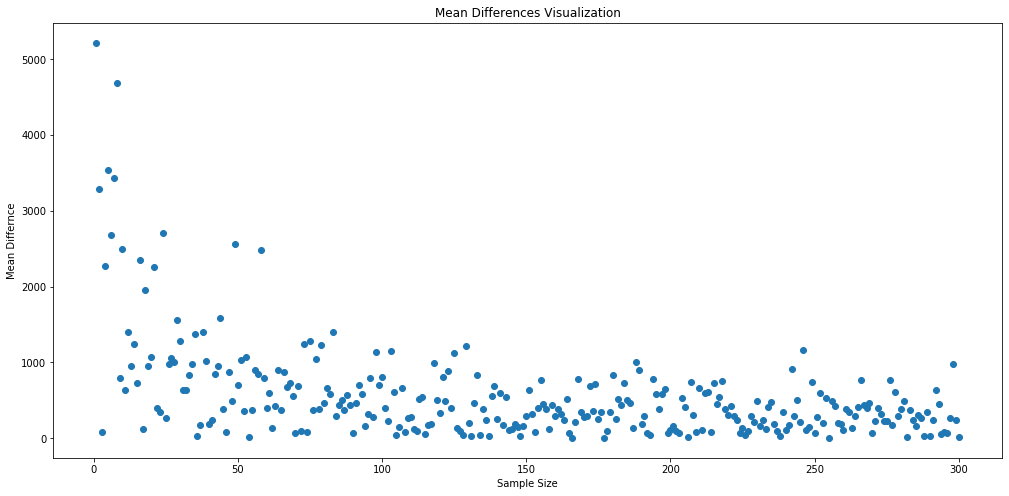

In [ ]:
fig, ax = plt.subplots(figsize=(17,8))

# Create scatter plot
ax.scatter(n, 
           means_diff)

ax.set(title = "Mean Differences Visualization",
       xlabel = "Sample Size", 
       ylabel = "Mean Differnce")

plt.show()

Repeating it 20 times with a sample size of 300 and trying to plot the results of 20 times in one graph

In [ ]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
n = []
for i in range(1,301): # sample size of 300
    n.append(i)

temp1=[]
temp2=[]
for j in range(1,21):
    for k in n:
        k_df = df.sample(n=k)
        s_mean = k_df['TUITIONFEE_IN'].mean()
        temp1.append(k)
        temp2.append(abs(s_mean-mean))
          
means_diff ={"sample size":temp1,"mean difference":temp2}
#df_300 is the new dataframe containing 20 observations of mean differences for a sample size of 300
df_300 = pd.DataFrame(means_diff) # Assigning sample size list as the index for convenience


Even though the below graph is large to see if you zoom in you can understand the difference that sample size < 40 has more mean differences

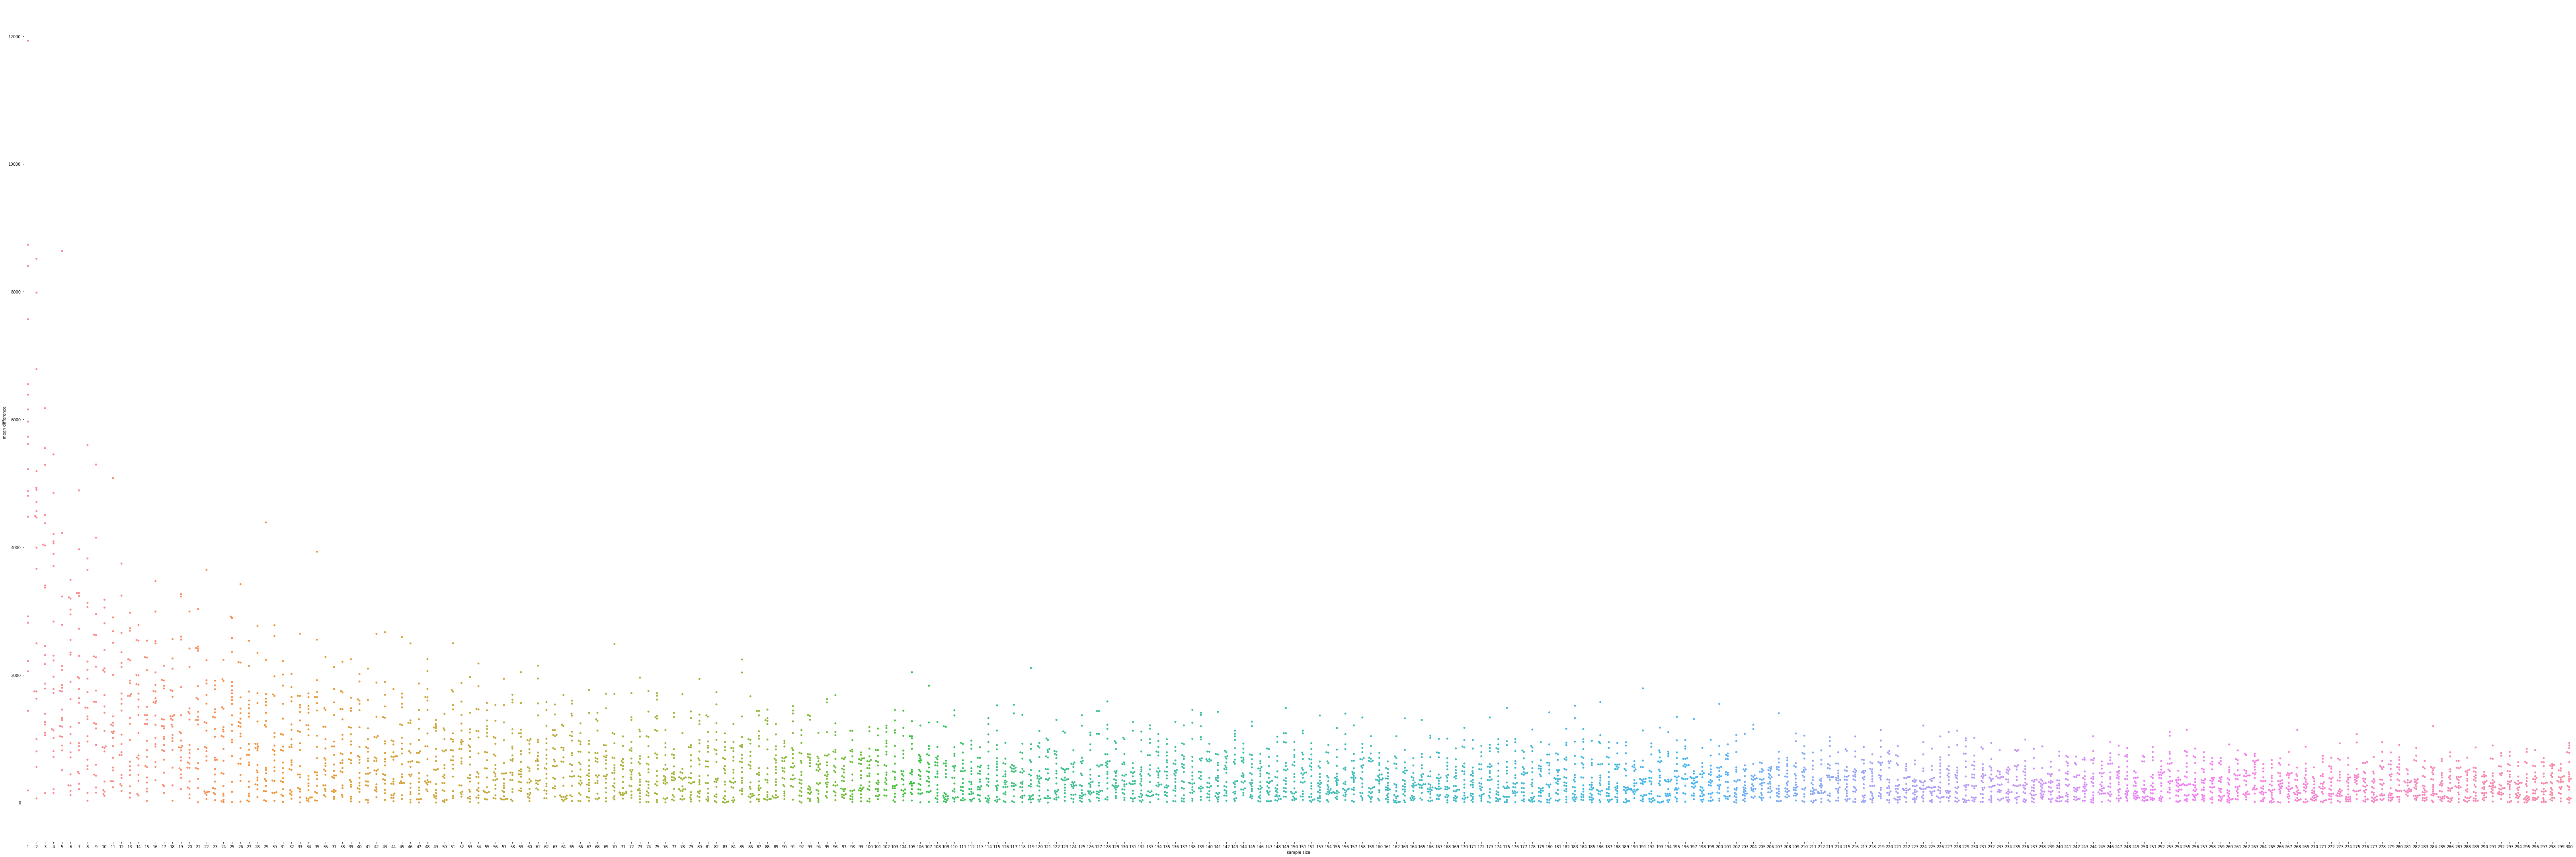

In [ ]:
sns.catplot(x="sample size", y="mean difference",kind="swarm", data=df_300, height=30, aspect=3)

In [ ]:
# The end - Give yourself a pat on the back!